In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import seaborn as sns

In [3]:
df = pd.read_csv('Data/Faults.csv')

In [4]:
df.shape

(1941, 34)

In [5]:
df.head()

,X_Min,X_Max,Y_Min,Y_Max,Pix_Area,X_perimeter,Y_perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.8182,-0.2913,0.5822,1,0,0,0,0,0,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.6667,-0.1228,0.2150,1,0,0,0,0,0,0
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.8444,-0.1568,0.5212,1,0,0,0,0,0,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.9338,-0.1992,1.0000,1,0,0,0,0,0,0


In [6]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   X_Min                  1941 non-null   int64  
 1   X_Max                  1941 non-null   int64  
 2   Y_Min                  1941 non-null   int64  
 3   Y_Max                  1941 non-null   int64  
 4   Pix_Area               1941 non-null   int64  
 5   X_perimeter            1941 non-null   int64  
 6   Y_perimeter            1941 non-null   int64  
 7   Sum_of_Luminosity      1941 non-null   int64  
 8   Minimum_of_Luminosity  1941 non-null   int64  
 9   Maximum_of_Luminosity  1941 non-null   int64  
 10  Length_of_Conveyer     1941 non-null   int64  
 11  TypeOfSteel_A300       1941 non-null   int64  
 12  TypeOfSteel_A400       1941 non-null   int64  
 13  Steel_Plate_Thickness  1941 non-null   int64  
 14  Edges_Index            1941 non-null   float64
 15  Empty_Index    

In [7]:
df.sum()

X_Min                    1.108575e+06
X_Max                    1.199469e+06
Y_Min                    3.203979e+09
Y_Max                    3.204084e+09
Pix_Area                 3.676018e+06
X_perimeter              2.171110e+05
Y_perimeter              1.610370e+05
Sum_of_Luminosity        4.004519e+08
Minimum_of_Luminosity    1.641090e+05
Maximum_of_Luminosity    2.527060e+05
Length_of_Conveyer       2.832230e+06
TypeOfSteel_A300         7.770000e+02
TypeOfSteel_A400         1.164000e+03
Steel_Plate_Thickness    1.528300e+05
Edges_Index              6.438592e+02
Empty_Index              8.039687e+02
Square_Index             1.107859e+03
Outside_X_Index          6.475390e+01
Edges_X_Index            1.185036e+03
Edges_Y_Index            1.578950e+03
Outside_Global_Index     1.117500e+03
LogOfAreas               4.837726e+03
Log_X_Index              2.592567e+03
Log_Y_Index              2.723750e+03
Orientation_Index        1.616613e+02
Luminosity_Index        -2.548631e+02
SigmoidOfAre


# Check Missing Values

In [8]:
df.isnull().sum()

X_Min                    0
X_Max                    0
Y_Min                    0
Y_Max                    0
Pix_Area                 0
X_perimeter              0
Y_perimeter              0
Sum_of_Luminosity        0
Minimum_of_Luminosity    0
Maximum_of_Luminosity    0
Length_of_Conveyer       0
TypeOfSteel_A300         0
TypeOfSteel_A400         0
Steel_Plate_Thickness    0
Edges_Index              0
Empty_Index              0
Square_Index             0
Outside_X_Index          0
Edges_X_Index            0
Edges_Y_Index            0
Outside_Global_Index     0
LogOfAreas               0
Log_X_Index              0
Log_Y_Index              0
Orientation_Index        0
Luminosity_Index         0
SigmoidOfAreas           0
Pastry                   0
Z_Scratch                0
K_Scatch                 0
Stains                   0
Dirtiness                0
Bumps                    0
Other_Faults             0
dtype: int64

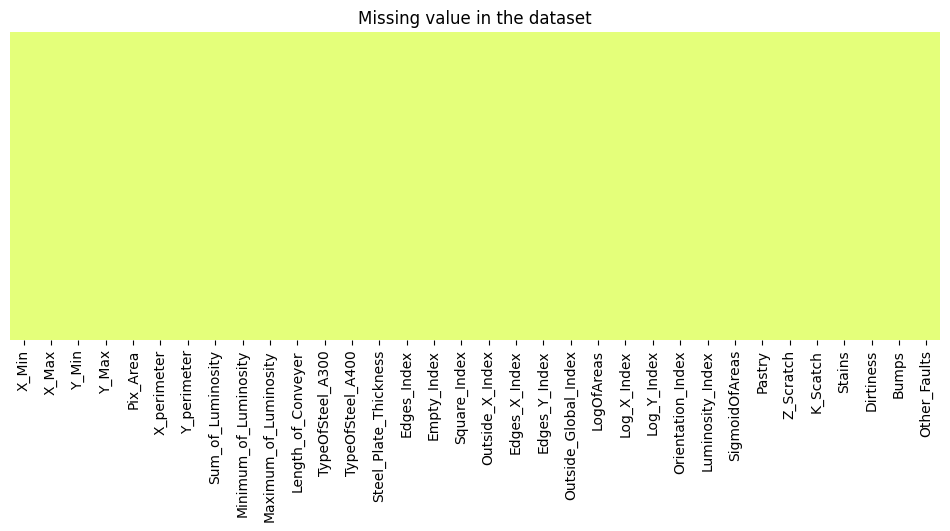

In [9]:
plt.figure(figsize=(12,4))
sns.heatmap(df.isnull(),cbar=False,cmap='Wistia',yticklabels=False)
plt.title('Missing value in the dataset');

In [10]:
df.iloc[:,27:34]

,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
1936,0,0,0,0,0,0,1
1937,0,0,0,0,0,0,1
1938,0,0,0,0,0,0,1
1939,0,0,0,0,0,0,1


In [11]:
y=df.iloc[:,27:34];
X=df.iloc[:,0:27];


# MinMax Scaling

(1941, 27)


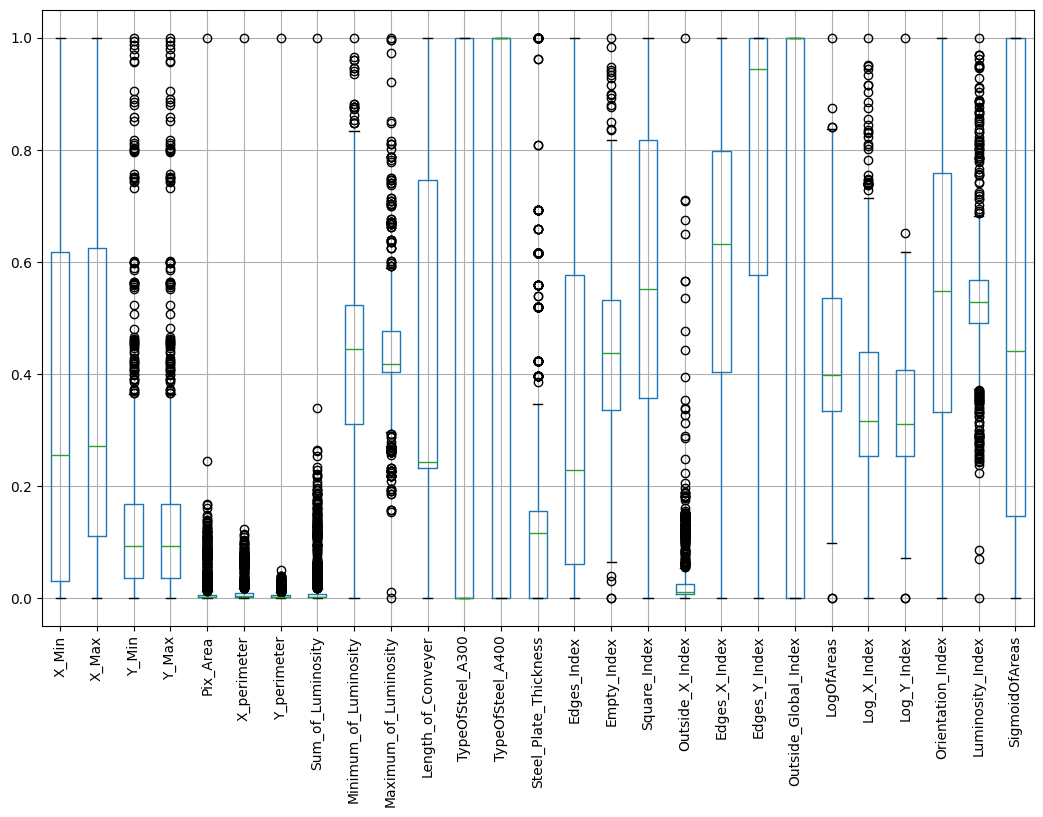

In [12]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range =(0,1))

X_std = pd.DataFrame(sc.fit_transform(X), columns = X.columns)
print(X_std.shape)
X_std.boxplot(figsize = (12.8,8), rot = 90)
plt.boxplot
plt.show()

# Feature_Selection

In [13]:

from sklearn.feature_selection import SelectKBest, chi2
skf = SelectKBest(score_func=chi2, k=15)
skf.fit(X_std, y)

,"score_func score_func: callable, default=f_classifFunction taking two arrays X and y, and returning a pair of arrays(scores, pvalues) or a single array with scores.Default is f_classif (see below ""See Also""). The default function onlyworks with classification tasks... versionadded:: 0.18",<function chi...x7e219e1a2200>
,"k k: int or ""all"", default=10Number of top features to select.The ""all"" option bypasses selection, for use in a parameter search.",15


In [14]:

X_std = X_std[skf.get_feature_names_out()]

In [15]:
X_std

,X_Min,X_Max,Sum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Outside_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Orientation_Index,SigmoidOfAreas
0,0.024633,0.026916,0.002068,0.811287,1.0,0.0,0.153846,0.050040,0.003660,1.000000,1.0,0.435312,0.217122,0.912493,0.525766
1,0.378299,0.378584,0.000962,0.811287,1.0,0.0,0.153846,0.768388,0.002402,0.965006,1.0,0.354804,0.172082,0.899834,0.203632
2,0.486217,0.486249,0.000666,0.698413,1.0,0.0,0.230769,0.975683,0.002516,0.944725,1.0,0.317509,0.172082,0.836082,0.108967
3,0.500293,0.500878,0.001617,0.222222,0.0,1.0,0.961538,0.732215,0.004231,1.000000,1.0,0.398243,0.196206,0.925707,0.456527
4,0.756012,0.761849,0.021282,0.222222,0.0,1.0,0.557692,0.069835,0.012694,0.987915,1.0,0.630962,0.335184,0.970797,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,0.146041,0.159743,0.003001,0.234568,0.0,1.0,0.000000,0.367966,0.021844,0.713430,0.0,0.437299,0.413328,0.283654,0.688309
1937,0.084457,0.100059,0.002963,0.234568,0.0,1.0,0.000000,0.212822,0.024360,0.693464,0.0,0.441743,0.429267,0.272053,0.792622
1938,0.085044,0.099473,0.003220,0.234568,0.0,1.0,0.000000,0.214228,0.022644,0.665616,0.0,0.443279,0.418809,0.256317,0.668445
1939,0.080352,0.097133,0.004526,0.234568,0.0,1.0,0.000000,0.202472,0.026075,0.642287,0.0,0.475393,0.439039,0.469259,0.990806


In [16]:
targets = df.iloc[:, 27:]
df.drop(targets.columns, axis=1, inplace=True) 
df['Target'] = targets.idxmax(1)
df.head()

,X_Min,X_Max,Y_Min,Y_Max,Pix_Area,X_perimeter,Y_perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Target
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822,Pastry
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984,Pastry
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150,Pastry
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.5385,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212,Pastry
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.2833,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000,Pastry


<Axes: >

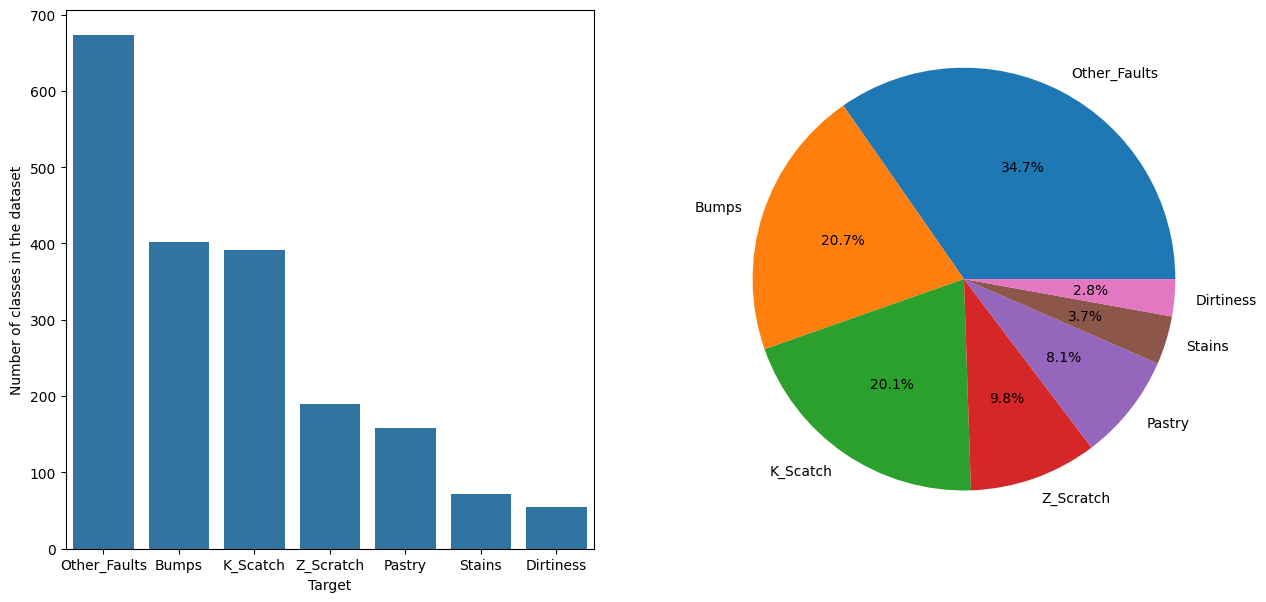

In [17]:
target_counts= df['Target'].value_counts()

fig, ax = plt.subplots(1, 2, figsize=(15,7))
target_counts_barplot = sns.barplot(x = target_counts.index,y = target_counts.values, ax = ax[0])
target_counts_barplot.set_ylabel('Number of classes in the dataset')

colors = ['#8d99ae','#ffe066', '#f77f00','#348aa7','#bce784','#ffcc99',  '#f25f5c']
target_counts.plot.pie(autopct="%1.1f%%", ax=ax[1])

In [18]:
df['Target'] = pd.Categorical(df['Target'])
df['Target_Code'] = df.Target.cat.codes

In [19]:
df.head()

,X_Min,X_Max,Y_Min,Y_Max,Pix_Area,X_perimeter,Y_perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Target,Target_Code
0,42,50,270900,270944,267,17,44,24220,76,108,...,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822,Pastry,4
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984,Pastry,4
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150,Pastry,4
3,853,860,369370,369415,176,13,45,18996,99,126,...,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212,Pastry,4
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000,Pastry,4


In [20]:
y=df.iloc[:,27];
y.head()

0    Pastry
1    Pastry
2    Pastry
3    Pastry
4    Pastry
Name: Target, dtype: category
Categories (7, str): ['Bumps', 'Dirtiness', 'K_Scatch', 'Other_Faults', 'Pastry', 'Stains', 'Z_Scratch']

In [21]:
y

0             Pastry
1             Pastry
2             Pastry
3             Pastry
4             Pastry
            ...     
1936    Other_Faults
1937    Other_Faults
1938    Other_Faults
1939    Other_Faults
1940    Other_Faults
Name: Target, Length: 1941, dtype: category
Categories (7, str): ['Bumps', 'Dirtiness', 'K_Scatch', 'Other_Faults', 'Pastry', 'Stains', 'Z_Scratch']

<Axes: xlabel='Target', ylabel='X_Max'>

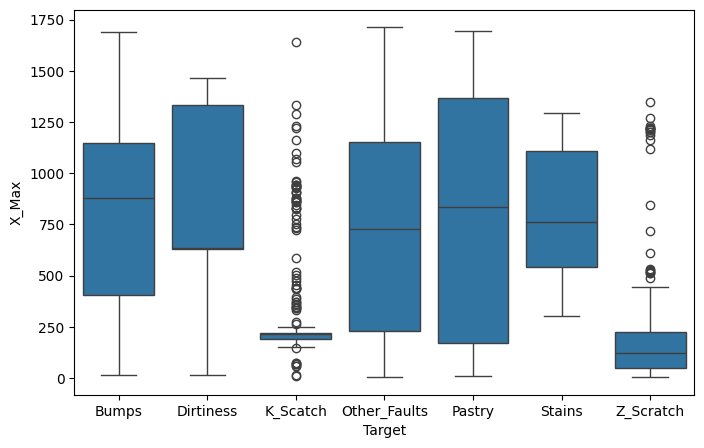

In [22]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Target', y='X_Max', data=df)

<Axes: ylabel='count'>

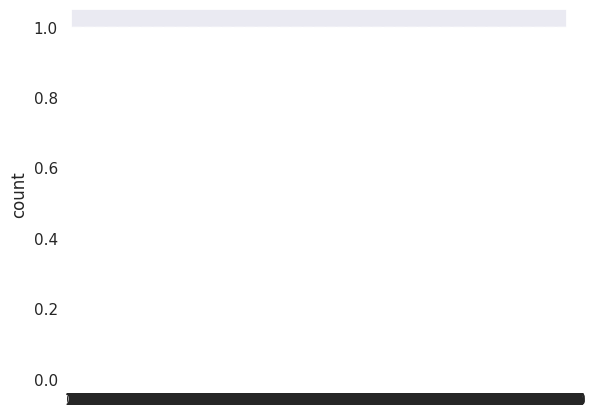

In [23]:
from sklearn.preprocessing import LabelEncoder  
le = LabelEncoder()
df['Target'] = le.fit_transform(df['Target'])
sns.set(style ="darkgrid")
sns.countplot(df['Target'])

In [24]:
df.corr()

,X_Min,X_Max,Y_Min,Y_Max,Pix_Area,X_perimeter,Y_perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Target,Target_Code
X_Min,1.000000,0.988314,0.041821,0.041807,-0.307322,-0.258937,-0.118757,-0.339045,0.237637,-0.075554,...,0.367907,0.147282,-0.428553,-0.437944,-0.326851,0.178585,-0.031578,-0.355251,-0.155906,-0.155906
X_Max,0.988314,1.000000,0.052147,0.052135,-0.225399,-0.186326,-0.090138,-0.247052,0.168649,-0.062392,...,0.271915,0.099253,-0.332169,-0.324012,-0.265990,0.115019,-0.038996,-0.286736,-0.179694,-0.179694
Y_Min,0.041821,0.052147,1.000000,1.000000,0.017670,0.023843,0.024150,0.007362,-0.065703,-0.067785,...,-0.036543,-0.062911,0.044952,0.070406,-0.008442,-0.086497,-0.090654,0.025257,-0.139695,-0.139695
Y_Max,0.041807,0.052135,1.000000,1.000000,0.017840,0.024038,0.024380,0.007499,-0.065733,-0.067776,...,-0.036549,-0.062901,0.044994,0.070432,-0.008382,-0.086480,-0.090666,0.025284,-0.139694,-0.139694
Pix_Area,-0.307322,-0.225399,0.017670,0.017840,1.000000,0.966644,0.827199,0.978952,-0.497204,0.110063,...,-0.463571,-0.109655,0.650234,0.603072,0.578342,-0.137604,-0.043449,0.422947,-0.076184,-0.076184
X_perimeter,-0.258937,-0.186326,0.023843,0.024038,0.966644,1.000000,0.912436,0.912956,-0.400427,0.111363,...,-0.412100,-0.079106,0.563036,0.524716,0.523472,-0.101731,-0.032617,0.380605,-0.056565,-0.056565
Y_perimeter,-0.118757,-0.090138,0.024150,0.024380,0.827199,0.912436,1.000000,0.704876,-0.213758,0.061809,...,-0.136723,0.013438,0.294040,0.228485,0.344378,0.031381,-0.047778,0.191772,-0.018765,-0.018765
Sum_of_Luminosity,-0.339045,-0.247052,0.007362,0.007499,0.978952,0.912956,0.704876,1.000000,-0.540566,0.136515,...,-0.529745,-0.121090,0.712128,0.667736,0.618795,-0.158483,-0.014067,0.464248,-0.086180,-0.086180
Minimum_of_Luminosity,0.237637,0.168649,-0.065703,-0.065733,-0.497204,-0.400427,-0.213758,-0.540566,1.000000,0.429605,...,0.316610,0.035462,-0.678762,-0.567655,-0.588208,0.057123,0.669534,-0.514797,0.086158,0.086158
Maximum_of_Luminosity,-0.075554,-0.062392,-0.067785,-0.067776,0.110063,0.111363,0.061809,0.136515,0.429605,1.000000,...,-0.167441,-0.124039,0.007672,0.092823,-0.069522,-0.169747,0.870160,-0.039651,-0.099244,-0.099244


In [25]:
df.describe()

,X_Min,X_Max,Y_Min,Y_Max,Pix_Area,X_perimeter,Y_perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Target,Target_Code
count,1941.000000,1941.000000,1.941000e+03,1.941000e+03,1941.000000,1941.000000,1941.000000,1.941000e+03,1941.000000,1941.000000,...,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000
mean,571.136012,617.964451,1.650685e+06,1.650739e+06,1893.878413,111.855229,82.965997,2.063121e+05,84.548686,130.193715,...,0.813472,0.575734,2.492388,1.335686,1.403271,0.083288,-0.131305,0.585420,2.569809,2.569809
std,520.690671,497.627410,1.774578e+06,1.774590e+06,5168.459560,301.209187,426.482879,5.122936e+05,32.134276,18.690992,...,0.234274,0.482352,0.788930,0.481612,0.454345,0.500868,0.148767,0.339452,1.762407,1.762407
min,0.000000,4.000000,6.712000e+03,6.724000e+03,2.000000,2.000000,1.000000,2.500000e+02,0.000000,37.000000,...,0.048400,0.000000,0.301000,0.301000,0.000000,-0.991000,-0.998900,0.119000,0.000000,0.000000
25%,51.000000,192.000000,4.712530e+05,4.712810e+05,84.000000,15.000000,13.000000,9.522000e+03,63.000000,124.000000,...,0.596800,0.000000,1.924300,1.000000,1.079200,-0.333300,-0.195000,0.248200,2.000000,2.000000
50%,435.000000,467.000000,1.204128e+06,1.204136e+06,174.000000,26.000000,25.000000,1.920200e+04,90.000000,127.000000,...,0.947400,1.000000,2.240600,1.176100,1.322200,0.095200,-0.133000,0.506300,3.000000,3.000000
75%,1053.000000,1072.000000,2.183073e+06,2.183084e+06,822.000000,84.000000,83.000000,8.301100e+04,106.000000,140.000000,...,1.000000,1.000000,2.914900,1.518500,1.732400,0.511600,-0.066600,0.999800,3.000000,3.000000
max,1705.000000,1713.000000,1.298766e+07,1.298769e+07,152655.000000,10449.000000,18152.000000,1.159141e+07,203.000000,253.000000,...,1.000000,1.000000,5.183700,3.074100,4.258700,0.991700,0.642100,1.000000,6.000000,6.000000


# Removing Outliers

In [26]:
from sklearn.cluster import DBSCAN
from collections import Counter
eps_r = 0.1
while eps_r < 10:
    dbscan_model = DBSCAN(eps=eps_r, min_samples=7).fit(X_std) 
    
    if Counter(dbscan_model.labels_)[-1] < 0.1*len(X_std):
        print('The neighbourhood distance considered for removal of less than 10% outliers is: {}'.format(eps_r))
        break
        
    eps_r = eps_r + 0.1

The neighbourhood distance considered for removal of less than 10% outliers is: 0.4


In [27]:

dbscan_model = DBSCAN(eps=eps_r, min_samples=7).fit(X_std)

Check the shape of outliers. It has to be less than 10% of 1941 (i.e., less than 194)

In [28]:
outliers = X_std[dbscan_model.labels_ == -1]
outliers.shape

(141, 15)

In [29]:
X_std.drop(outliers.index, axis=0, inplace=True)
y.drop(outliers.index, axis=0, inplace=True)

In [30]:
X_std.head()

,X_Min,X_Max,Sum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Outside_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Orientation_Index,SigmoidOfAreas
0,0.024633,0.026916,0.002068,0.811287,1.0,0.0,0.153846,0.050040,0.003660,1.000000,1.0,0.435312,0.217122,0.912493,0.525766
1,0.378299,0.378584,0.000962,0.811287,1.0,0.0,0.153846,0.768388,0.002402,0.965006,1.0,0.354804,0.172082,0.899834,0.203632
2,0.486217,0.486249,0.000666,0.698413,1.0,0.0,0.230769,0.975683,0.002516,0.944725,1.0,0.317509,0.172082,0.836082,0.108967
4,0.756012,0.761849,0.021282,0.222222,0.0,1.0,0.557692,0.069835,0.012694,0.987915,1.0,0.630962,0.335184,0.970797,1.000000
5,0.252199,0.255705,0.005358,0.282187,0.0,1.0,0.000000,0.622990,0.007319,1.000000,1.0,0.511664,0.266994,0.940435,0.985698


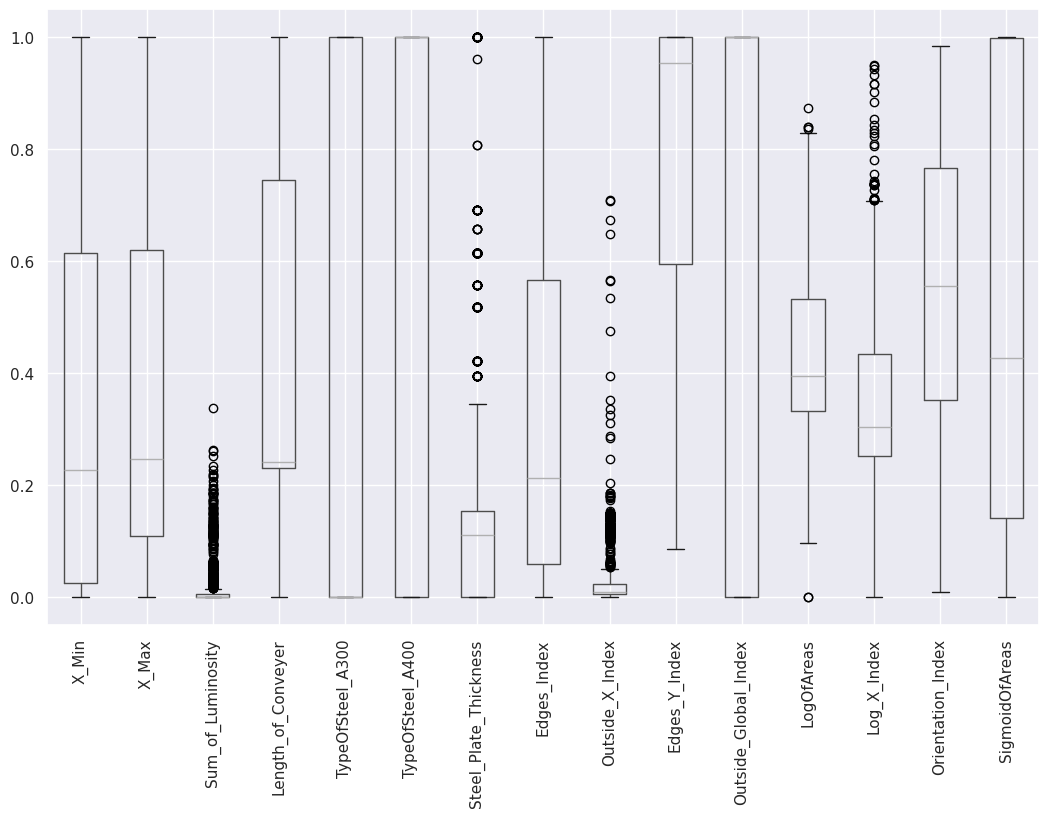

In [31]:
X_std.boxplot(figsize = (12.8,8), rot = 90)
plt.boxplot
plt.show()

In [32]:
X_std.info()

<class 'pandas.DataFrame'>
Index: 1800 entries, 0 to 1940
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   X_Min                  1800 non-null   float64
 1   X_Max                  1800 non-null   float64
 2   Sum_of_Luminosity      1800 non-null   float64
 3   Length_of_Conveyer     1800 non-null   float64
 4   TypeOfSteel_A300       1800 non-null   float64
 5   TypeOfSteel_A400       1800 non-null   float64
 6   Steel_Plate_Thickness  1800 non-null   float64
 7   Edges_Index            1800 non-null   float64
 8   Outside_X_Index        1800 non-null   float64
 9   Edges_Y_Index          1800 non-null   float64
 10  Outside_Global_Index   1800 non-null   float64
 11  LogOfAreas             1800 non-null   float64
 12  Log_X_Index            1800 non-null   float64
 13  Orientation_Index      1800 non-null   float64
 14  SigmoidOfAreas         1800 non-null   float64
dtypes: float64(15)
memor

In [33]:
y

0             Pastry
1             Pastry
2             Pastry
4             Pastry
5             Pastry
            ...     
1936    Other_Faults
1937    Other_Faults
1938    Other_Faults
1939    Other_Faults
1940    Other_Faults
Name: Target, Length: 1800, dtype: category
Categories (7, str): ['Bumps', 'Dirtiness', 'K_Scatch', 'Other_Faults', 'Pastry', 'Stains', 'Z_Scratch']

# Splitting the dataset into the Training set and Test set

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, train_size = 0.90, random_state = 15)

In [35]:
y

0             Pastry
1             Pastry
2             Pastry
4             Pastry
5             Pastry
            ...     
1936    Other_Faults
1937    Other_Faults
1938    Other_Faults
1939    Other_Faults
1940    Other_Faults
Name: Target, Length: 1800, dtype: category
Categories (7, str): ['Bumps', 'Dirtiness', 'K_Scatch', 'Other_Faults', 'Pastry', 'Stains', 'Z_Scratch']

# RandomForestClassifier

In [36]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=10, random_state=68)
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)
y_pred_train = rfc.predict(X_train)
from sklearn.metrics import accuracy_score
print('The training accuracy of the model is {}'.format(accuracy_score(y_train,y_pred_train)))
print('The testing accuracy of the model is {}'.format(accuracy_score(y_test,y_pred_rfc)))

The training accuracy of the model is 0.991358024691358
The testing accuracy of the model is 0.8


# Confusion Matrix

[[33  0  1 14  0  0  0]
 [ 0  3  0  2  0  0  0]
 [ 0  0 32  0  0  0  0]
 [ 9  0  2 43  0  1  0]
 [ 0  0  0  4  8  0  0]
 [ 0  0  0  1  0  7  0]
 [ 1  0  0  0  1  0 18]]


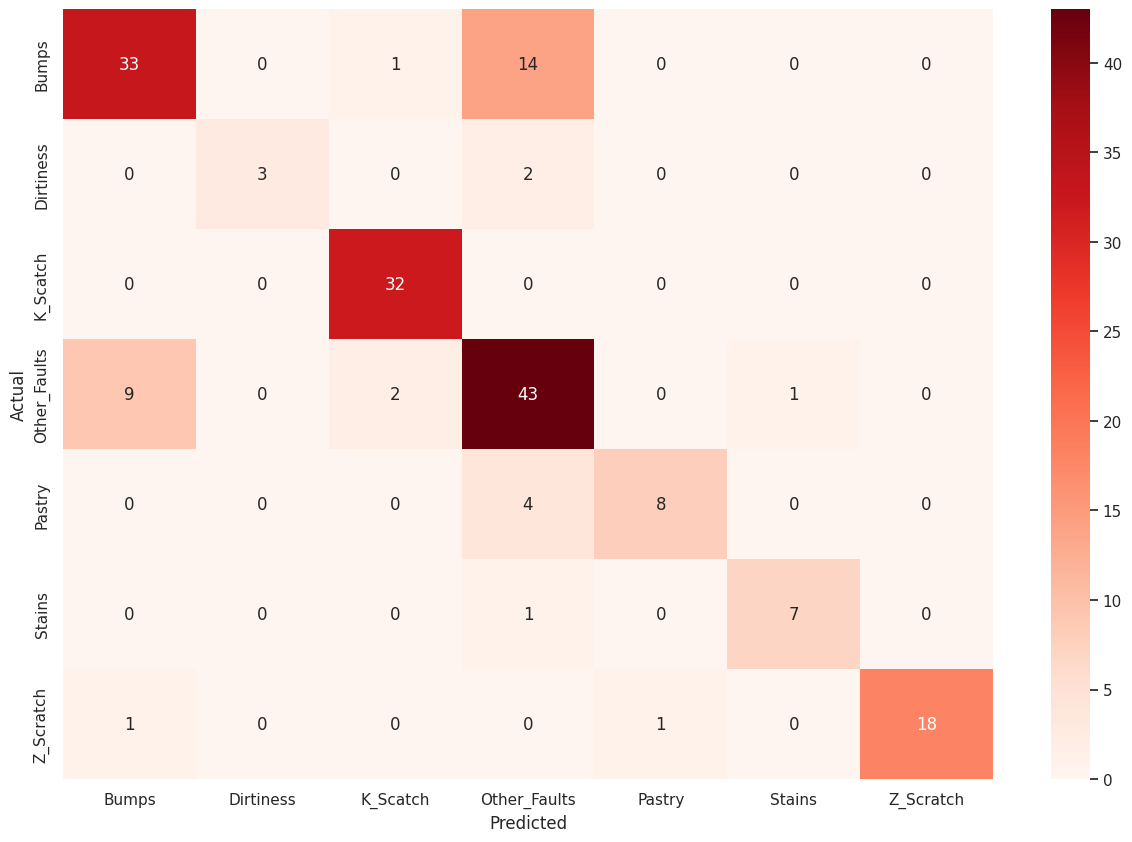

In [37]:


from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_rfc)

print(cm)
plt.figure(figsize=(15,10))
categories = np.unique(y)
df_cm = pd.DataFrame(cm, index = [i for i in categories], columns = [i for i in categories])
sns.heatmap(df_cm,annot=True,cmap='Reds')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [38]:
y_rfc = rfc.predict(X_std)

print('accuracy is {:.2f}%'.format(accuracy_score(y_rfc,y)*100))



accuracy is 97.22%


In [39]:
submission = pd.DataFrame({
        
        "Result": y_rfc
    })
submission.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [40]:
outputfile = 'Fault.model'
import joblib  as jb
jb.dump(rfc, outputfile, compress=9) 

['Fault.model']

In [41]:
outputfile = 'scaler.model'
import joblib  as jb
jb.dump(sc, outputfile, compress=9) 

['scaler.model']

In [42]:
new_data = pd.DataFrame({
    'X_Min': [0.30304],
    'X_Max':[0.29455],
    'Sum_of_Luminosity':[0.236578],
    'Length_of_Conveyer':[0.811287],
    'TypeOfSteel_A300':[1.0],
    'TypeOfSteel_A400':[0.0],
    'Steel_Plate_Thickness':[0.153846],
    'Edges_Index':[0.050040],
    'Outside_X_Index':[0.003660],
    'Edges_Y_Index':[1.000000],
    'Outside_Global_Index':[1.0],
    'LogOfAreas':[0.435312],
    'Log_X_Index':[0.217122],
    'Orientation_Index':[0.912493],
    'SigmoidOfAreas': [0.525766],
})

In [43]:
scaler = MinMaxScaler()
X_std = scaler.fit_transform(X_std)
new_data_scaled = scaler.transform(new_data)
rfc = RandomForestClassifier()
rfc.fit(X_std, y)
predictions = rfc.predict(new_data_scaled)
print(predictions)

['Pastry']
